#  __Predict Customer Personality to Boost Marketing Campaign__

https://github.com/dikaaka/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/DikaKencanaPutera_Predict%20Customer%20Personality%20to%20Boost%20Marketing%20Campaign%20by%20Using%20Machine%20Learning.ipynb

In [1]:
# Import Necessary Libraries and Dataset
# import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
# warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [2]:
df= pd.read_csv('marketing_campaign_data.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [5]:
# melihat kategori pada data bertipe object
print("Total kategori Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total kategori Education:\n", df["Education"].value_counts())

Total kategori Marital_Status:
 Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64 

Total kategori Education:
 S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64


##### Conversion Rate

In [6]:
ConR = round(df['Response'].sum()/df['NumWebVisitsMonth'].sum()*100,2)
print("Jadi, Conversion Rate perusahaan adalah",ConR,"%")

Jadi, Conversion Rate perusahaan adalah 2.8 %


In [7]:
#create conversion rate feature
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['cvr'] = df.apply(lambda x: safe_div(x['Response'],x['NumWebVisitsMonth']), axis=1)

## DATA CLEANING

In [8]:
# drop kolom Unnamed 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# drop kolom ID
df.drop(['ID'], axis=1, inplace=True)

In [10]:
# Drop Missing Value
df = df.dropna()
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cvr
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,...,0,0,0,0,0,0,3,11,1,0.142857
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,...,0,0,0,0,0,0,3,11,0,0.000000
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,...,0,0,0,0,0,0,3,11,0,0.000000
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,0,0,0,0,0,3,11,0,0.000000
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,...,0,0,0,0,0,0,3,11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,...,0,0,0,0,0,0,3,11,0,0.000000
2236,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,...,0,0,0,1,0,0,3,11,0,0.000000
2237,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,...,0,1,0,0,0,0,3,11,0,0.000000
2238,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,...,0,0,0,0,0,0,3,11,0,0.000000


## DATA ENGINEERING

In [11]:
# Membuat kolom `Umur`
df['Umur'] = 2023-df['Year_Birth']

In [12]:
# Membuat kolom 'Pengeluaran'
df['Pengeluaran'] = df["MntCoke"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [13]:
# Membuat kolom 'Anak'
df['Anak'] = df['Kidhome'] + df['Teenhome']

In [14]:
# Membuat kolom 'OrangTua'
df['OrangTua'] = np.where(df.Anak>0,1,0)

In [15]:
# Membuat kolom 'TinggalBersama'
df['TinggalBersama'] = df['Marital_Status'].replace({'Menikah':'Bersama', 'Bertunangan':'Sendiri', 'Lajang':'Sendiri', 'Cerai':'Sendiri', 'Janda':'Sendiri', 'Duda':'Sendiri'})

In [16]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Complain,Z_CostContact,Z_Revenue,Response,cvr,Umur,Pengeluaran,Anak,OrangTua,TinggalBersama
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,...,0,3,11,1,0.142857,66,1617000,0,0,Sendiri
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,...,0,3,11,0,0.000000,69,27000,2,1,Sendiri
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,...,0,3,11,0,0.000000,58,776000,0,0,Sendiri
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,...,0,3,11,0,0.000000,39,53000,1,1,Sendiri
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,...,0,3,11,0,0.000000,42,422000,1,1,Bersama


In [17]:
df['Umur'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Umur, dtype: float64

PENENTUAN KELOMPOK USIA:
- `Dewasa Awal` : < 35 tahun
- `Dewasa Akhir`: 35-45 tahun
- `Lansia Awal `: 45-55 tahun
- `Lansia Akhir`: 55-65 tahun
- `Manula` : > 65 tahun

In [18]:
# Membuat kolom kelompok umur
df['KelompokUsia'] = np.where(df['Umur']<35, 'Dewasa Awal', 
                              np.where(df['Umur']<44, 'Dewasa Akhir', 
                                       np.where(df['Umur']<54, 'Lansia Awal', 
                                                np.where(df['Umur']<64, 'Lansia Akhir',
                                                         np.where(df['Umur']<74, 'Manula', 
                                                         'Usia Tua' )))))

In [19]:
df['KelompokUsia'].value_counts()

Lansia Awal     733
Lansia Akhir    502
Manula          453
Dewasa Akhir    329
Usia Tua        109
Dewasa Awal      90
Name: KelompokUsia, dtype: int64

<module 'seaborn' from 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python39\\site-packages\\seaborn\\__init__.py'>

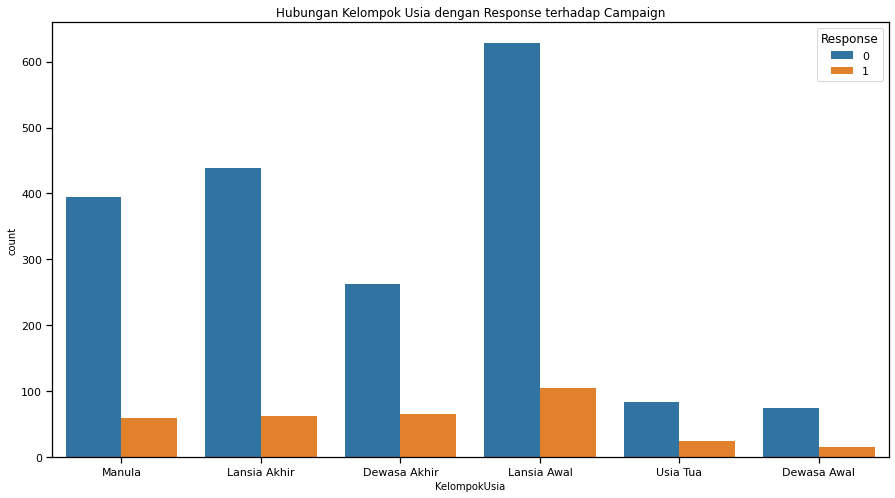

In [20]:
plt.figure(figsize= (15,8))
sns.countplot(x='KelompokUsia', hue='Response', data=df)
plt.title('Hubungan Kelompok Usia dengan Response terhadap Campaign')
sns

berdasarkan jumah, kelompok Usia `Lansia Awal(45-55 tahun)` cenderung lebih besar merespon terhadap campaign yang diberikan. Ini bisa menjadi tanda bahwa campaign akan lebih efektif ketika diberikan kepada kelompok usia ini, dengan response yang lebih banyak daripada kelompok usia lainnya, kita bisa memaksimalkan campaign ke dalam kelompok ini supaya mendapat respon positif yang lebih banyak. selain itu, kita akan melihat faktor apa saja yang menjadikan kelompok usia ini untuk merespon campaign yang kita berikan 

In [21]:
# FUNGTION TABLE PERCENTAGE
import pandas as pd
import seaborn as sns

def plotting_percentages(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

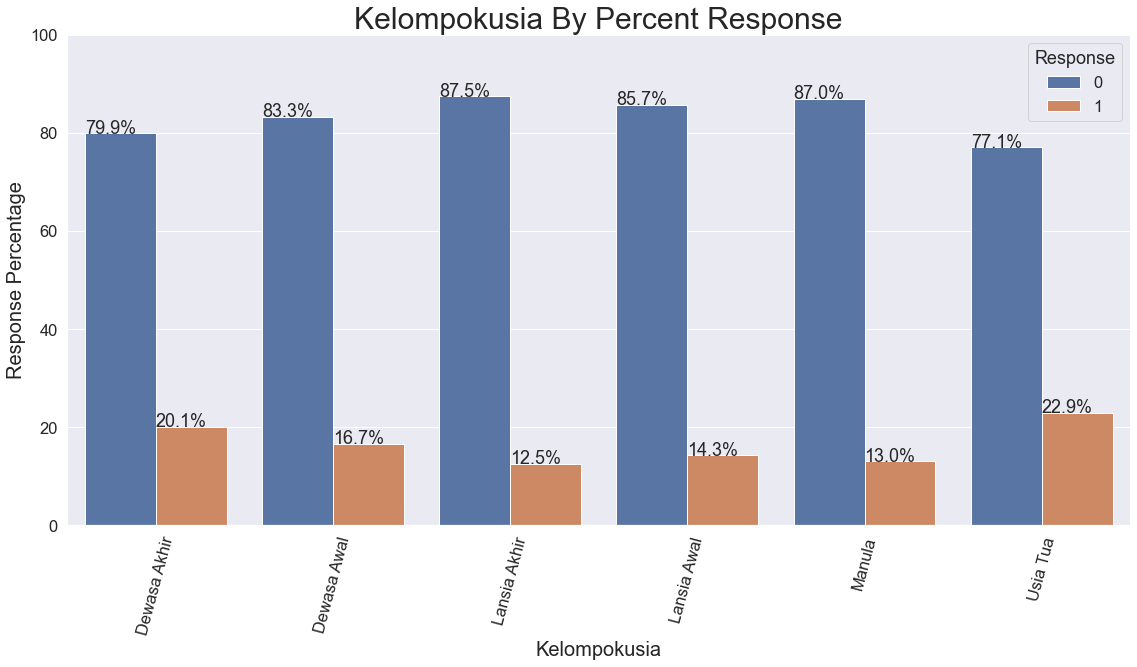

In [22]:
plotting_percentages(df=df, col='KelompokUsia', target='Response' )

kelompok usia `Lansia Akhir`(55-65 tahun) dan `Manula`(>65 tahun) cenderung paling sedikit untuk merespon campaign yang kita berikan, dengan demikian kita dapat mengetahui lebih lanjut faktor yang membuat kelompok ini cenderung untuk tidak merespon campaign yang kita berikan

### EDA

In [23]:
df_eda = df.copy()

In [24]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
dat = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cat.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        num.append(col)
    else:
        dat.append(col)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\3554345791.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\3554345791.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



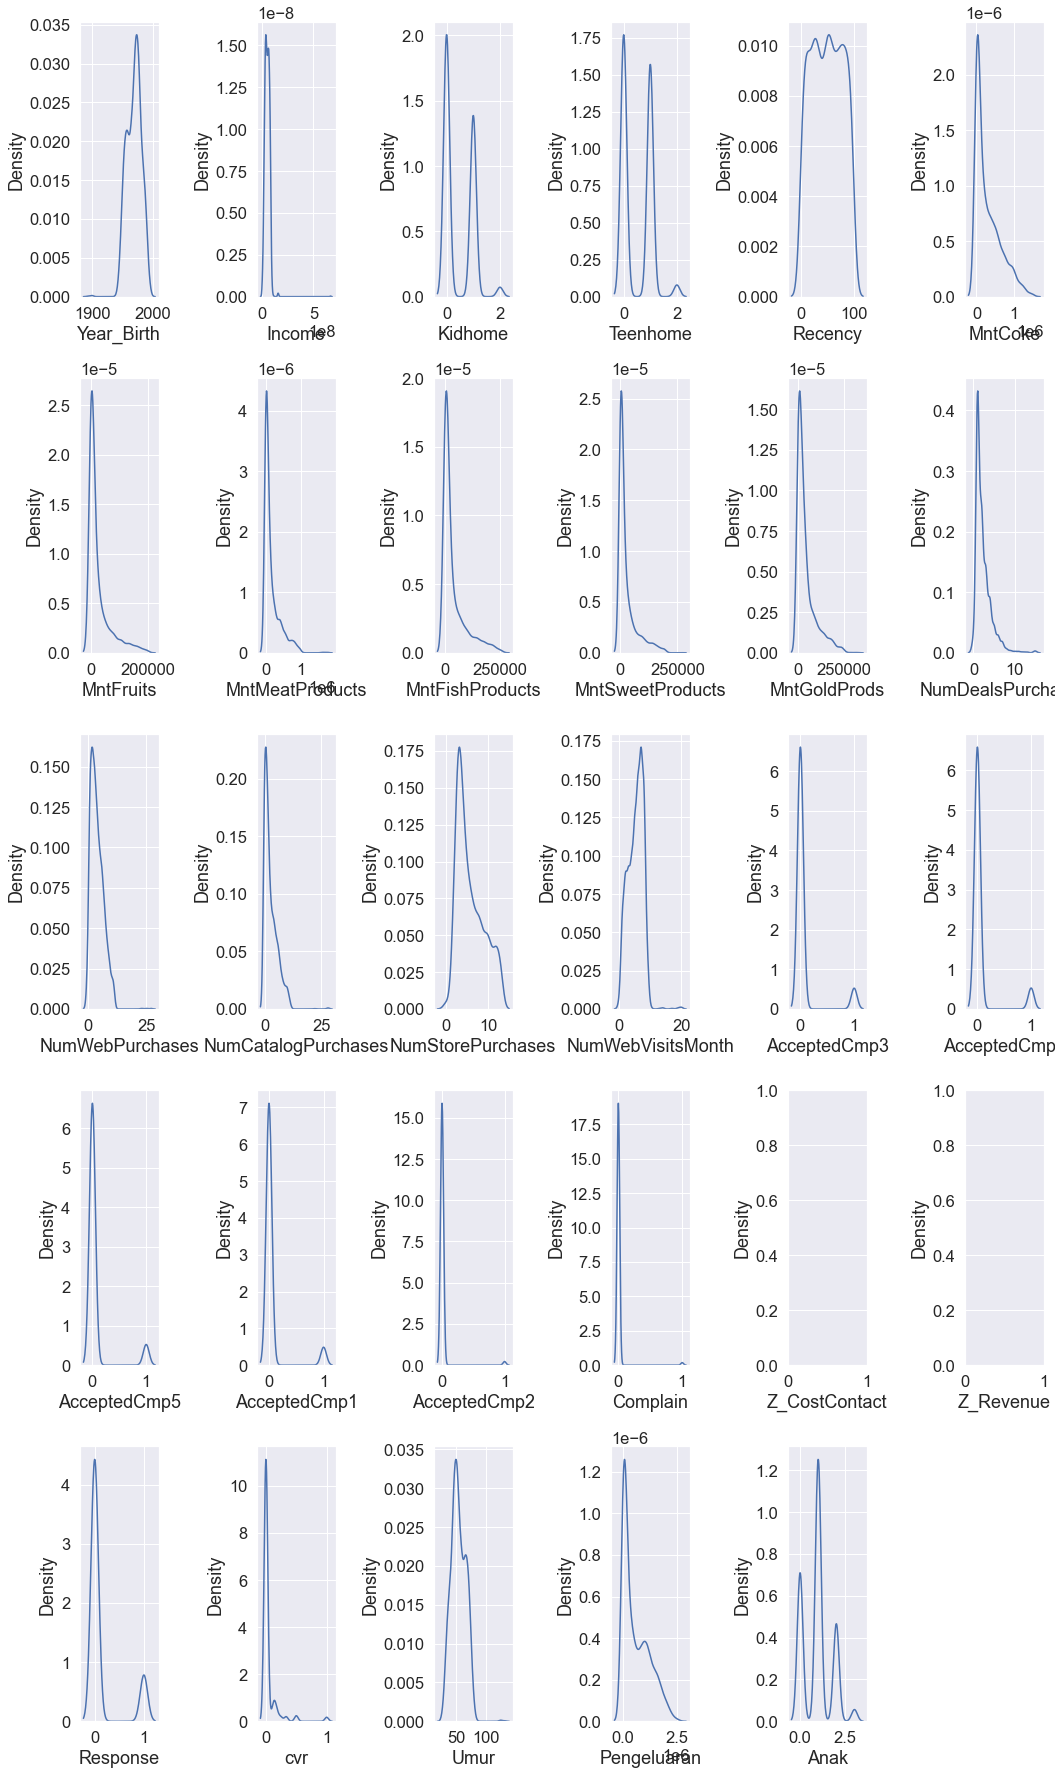

In [25]:
plt.figure(figsize= (15, 25))
for i in range(len(num)):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(x = df_eda[num[i]])
    plt.tight_layout()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2387982314.py:5: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2387982314.py:5: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2387982314.py:5: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2387982314.py:5: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6140\2387982314.py:5: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations

C:\Users\ASUS\AppData\Local\Temp\ipykernel_61

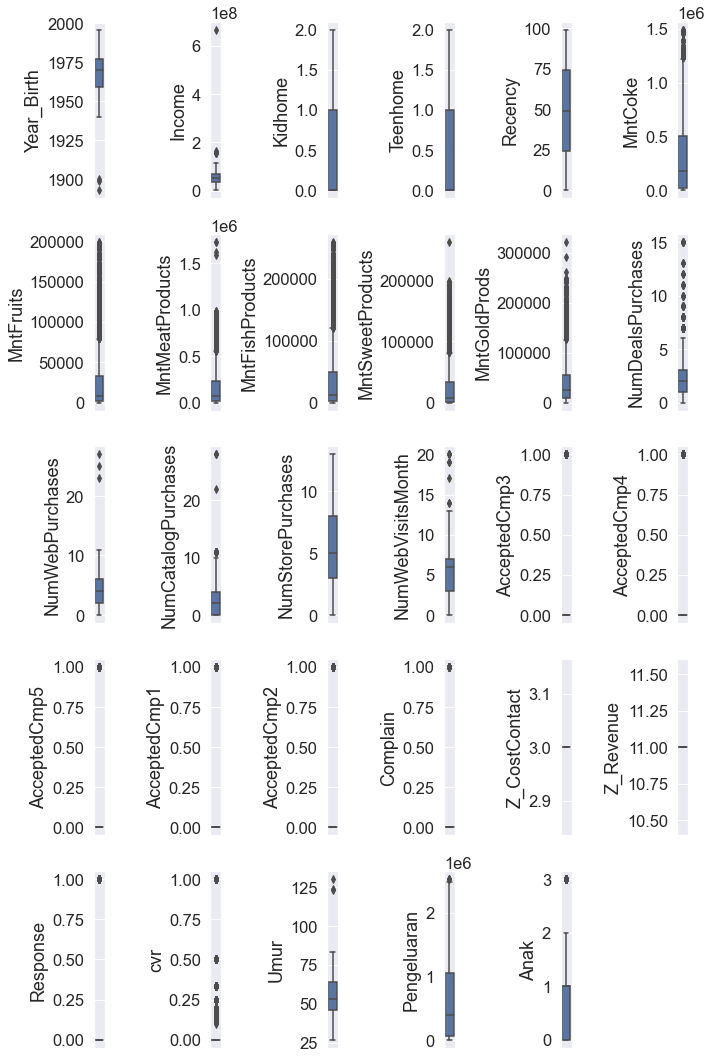

In [26]:
plt.figure(figsize= (10,15))
for i in range(len(num)):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y = df_eda[num[i]], orient='v')
    plt.tight_layout()

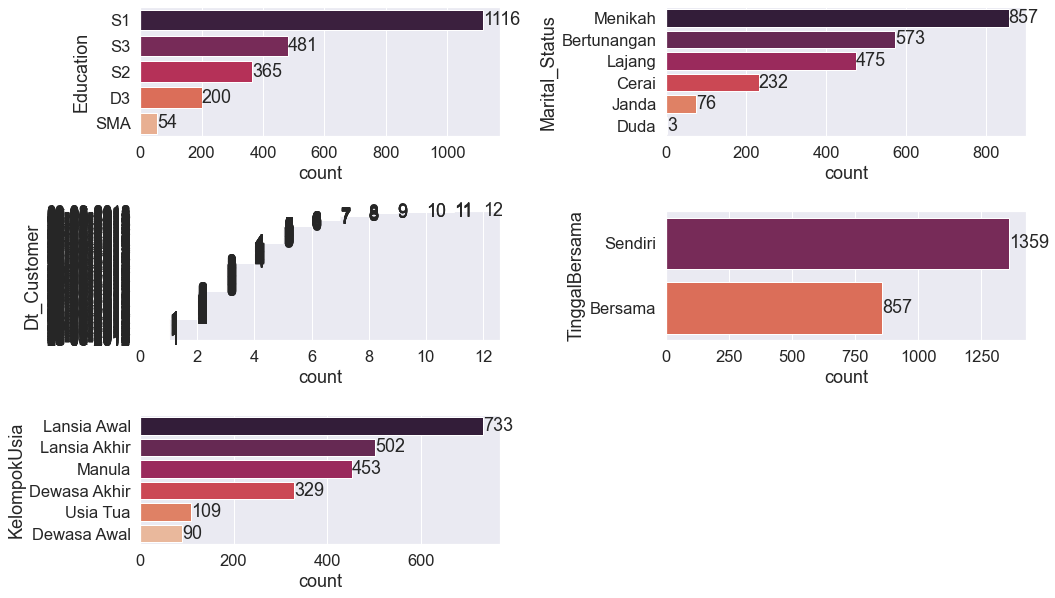

In [27]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cat[i], data=df_eda, palette='rocket', order=df_eda[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

<Axes: >

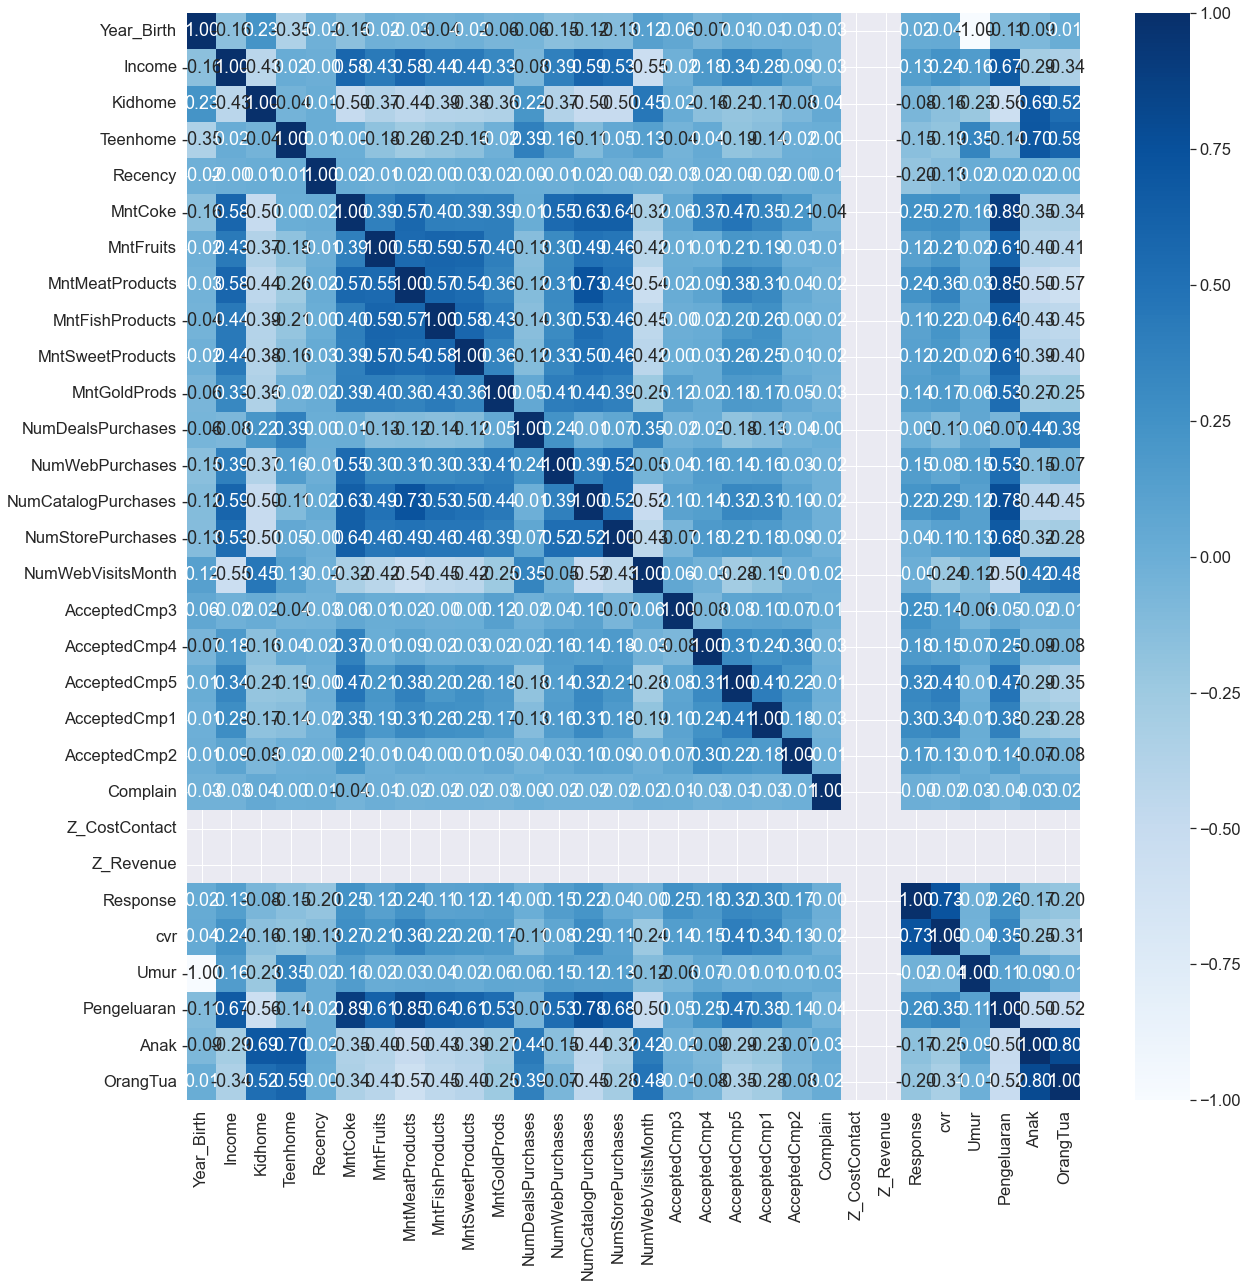

In [28]:
plt.figure(figsize= (20,20))
sns.heatmap(df_eda.corr(),cmap='Blues', annot=True, fmt='.2f')

In [29]:
df_task1 = df_eda.groupby('KelompokUsia').agg({'cvr':'sum'}).reset_index()
df_task1['sum_cvr'] = df_task1['cvr'].sum()
df_task1['pct'] = round((df_task1['cvr']/df_task1['sum_cvr'])*100, 2)
df_task1

,KelompokUsia,cvr,sum_cvr,pct
0,Dewasa Akhir,23.110317,96.375794,23.98
1,Dewasa Awal,6.781746,96.375794,7.04
2,Lansia Akhir,14.800794,96.375794,15.36
3,Lansia Awal,25.740873,96.375794,26.71
4,Manula,17.590873,96.375794,18.25
5,Usia Tua,8.351190,96.375794,8.67


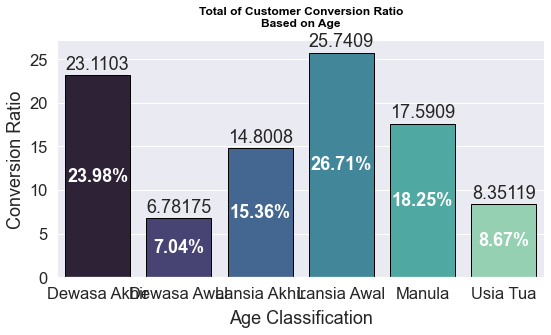

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='KelompokUsia', y='cvr', data=df_task1, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
#plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['23.98%', '7.04%', '15.36%', '26.71%','18.25%','8.67%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')

(0.0, 85.0)

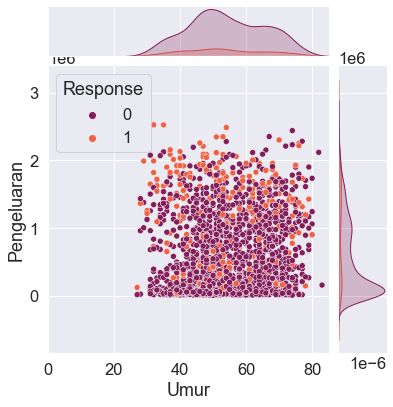

In [31]:
plot= sns.jointplot(x='Umur',y='Pengeluaran', data=df, hue="Response", palette='rocket')
plot.ax_marg_x.set_xlim(0, 85)

(0.0, 120000000.0)

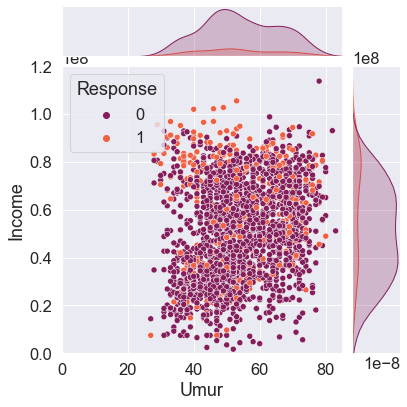

In [32]:
plot= sns.jointplot(x='Umur',y='Income', data=df, hue="Response", palette='rocket')
plot.ax_marg_x.set_xlim(0, 85)
plot.ax_marg_y.set_ylim(0, 120000000)

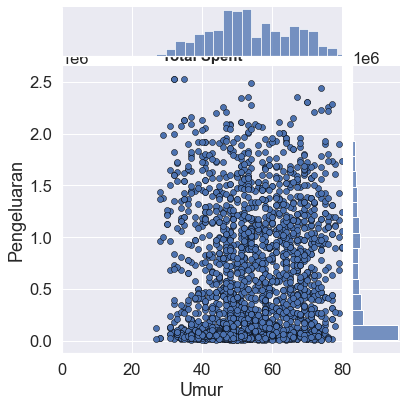

In [33]:
plot = sns.jointplot(x=df_eda['Umur'], y=df_eda['Pengeluaran'], edgecolor='black')
plt.title('Age\nvs.\nTotal Spent', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_totspent_jointplot.png')
plt.show()

### DATA CLEANING

### MISSING VALUE

In [34]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
cvr                    0
Umur                   0
Pengeluaran            0
Anak                   0
OrangTua               0
TinggalBersama         0
KelompokUsia           0
dtype: int64

tidak terdapat missing value pada dataset

### Duplicated data

In [35]:
df.duplicated().sum()

183

In [36]:
df.drop_duplicates(keep='first')

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,...,Z_CostContact,Z_Revenue,Response,cvr,Umur,Pengeluaran,Anak,OrangTua,TinggalBersama,KelompokUsia
0,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,...,3,11,1,0.142857,66,1617000,0,0,Sendiri,Manula
1,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,...,3,11,0,0.000000,69,27000,2,1,Sendiri,Manula
2,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,...,3,11,0,0.000000,58,776000,0,0,Sendiri,Lansia Akhir
3,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,...,3,11,0,0.000000,39,53000,1,1,Sendiri,Dewasa Akhir
4,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,...,3,11,0,0.000000,42,422000,1,1,Bersama,Dewasa Akhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,1977,S1,Bertunangan,666666000.0,1,0,02-06-2013,23,9000,14000,...,3,11,0,0.000000,46,62000,1,1,Sendiri,Lansia Awal
2235,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,...,3,11,0,0.000000,56,1341000,1,1,Bersama,Lansia Akhir
2237,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,...,3,11,0,0.000000,42,1241000,0,0,Sendiri,Dewasa Akhir
2238,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,...,3,11,0,0.000000,67,843000,1,1,Sendiri,Manula


### Drop Feature yang Redundant

In [37]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df.drop(to_drop, axis=1, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   MntCoke              2216 non-null   int64  
 6   MntFruits            2216 non-null   int64  
 7   MntMeatProducts      2216 non-null   int64  
 8   MntFishProducts      2216 non-null   int64  
 9   MntSweetProducts     2216 non-null   int64  
 10  MntGoldProds         2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   i

In [39]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cvr,Umur,Pengeluaran,Anak,OrangTua
count,2.216000e+03,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000
mean,5.224725e+07,0.441787,0.505415,49.012635,3.050916e+05,26356.046931,1.669959e+05,37637.635379,27028.880866,43965.252708,...,0.073105,0.064079,0.013538,0.009477,0.150271,0.043491,54.179603,6.070754e+05,0.947202,0.714350
std,2.517308e+07,0.536896,0.544181,28.948352,3.373279e+05,39793.916518,2.242833e+05,54752.082415,41072.045667,51815.414374,...,0.260367,0.244950,0.115588,0.096907,0.357417,0.141916,11.985554,6.029005e+05,0.749062,0.451825
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000e+03,0.000000,0.000000
25%,3.530300e+07,0.000000,0.000000,24.000000,2.400000e+04,2000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.900000e+04,0.000000,0.000000
50%,5.138150e+07,0.000000,0.000000,49.000000,1.745000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24500.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,3.965000e+05,1.000000,1.000000
75%,6.852200e+07,1.000000,1.000000,74.000000,5.050000e+05,33000.000000,2.322500e+05,50000.000000,33000.000000,56000.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.000000,1.048000e+06,1.000000,1.000000
max,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,262000.000000,321000.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2.525000e+06,3.000000,1.000000


#### One Hot Encoding untuk categorical Feature

In [40]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [41]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [42]:
onehot.head()

,Education_S1,Education_S2,Education_S3,Education_SMA,TinggalBersama_Sendiri,KelompokUsia_Dewasa Awal,KelompokUsia_Lansia Akhir,KelompokUsia_Lansia Awal,KelompokUsia_Manula,KelompokUsia_Usia Tua
0,1,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


#### Standardization

In [43]:
numerical_cols = [col for col in df.columns.tolist() if col not in categorical_cols]

In [44]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [45]:
std.head()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cvr,Umur,Pengeluaran,Anak,OrangTua
0,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,...,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.700334,0.986443,1.675488,-1.264803,-1.581389
1,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,1.236801,-0.962358,1.405806,0.632356
2,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,0.318822,0.280250,-1.264803,-1.581389
3,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,-1.266777,-0.919224,0.070501,0.632356
4,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,-1.016420,-0.307044,0.070501,0.632356


In [46]:
model = pd.concat([onehot, std], axis=1)

In [47]:
model.head()

,Education_S1,Education_S2,Education_S3,Education_SMA,TinggalBersama_Sendiri,KelompokUsia_Dewasa Awal,KelompokUsia_Lansia Akhir,KelompokUsia_Lansia Awal,KelompokUsia_Manula,KelompokUsia_Usia Tua,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,cvr,Umur,Pengeluaran,Anak,OrangTua
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.280839,-0.261661,-0.117148,-0.097812,2.377952,0.700334,0.986443,1.675488,-1.264803,-1.581389
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,1.236801,-0.962358,1.405806,0.632356
2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,0.318822,0.280250,-1.264803,-1.581389
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,-1.266777,-0.919224,0.070501,0.632356
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.280839,-0.261661,-0.117148,-0.097812,-0.420530,-0.306524,-1.016420,-0.307044,0.070501,0.632356
